# <a id='toc1_'></a>[Loan Default Prediction (Preprocessing)](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Loan Default Prediction (Preprocessing)](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## Libraries

In [2]:
# Basic python
import re
import sys

# Data manipulation
import polars as pl

# appending a path
sys.path.append('../src/')

# Own modules
import helpers as hp

## Read

In [3]:
# Define file path
path = "../data/raw/"
raw_file = "definitely_not_from_kaggle_loan_default_dataset.csv"

In [4]:
# Read data
df = pl.read_csv(path + raw_file)

In [5]:
df.head(3)

uuid,credit_application_date,default,person_bith_year_month_1_no_aggregation,activity_date_36_month_1_no_aggregation,location_cluster_03_month_1_most_frequent,contract_type_1_month_1_no_aggregation,activity_pattern_35_month_1_no_aggregation,activity_pattern_34_month_12_no_aggregation,activity_pattern_17_month_12_no_aggregation,activity_pattern_02_month_12_no_aggregation,device_age_2_month_1_social_mean,activity_pattern_09_last_12_months_max,client_type_1_month_9_no_aggregation,activity_pattern_07_last_9_months_max,activity_pattern_07_last_12_months_max,line_balance_type_11_last_12_months_max,line_balance_type_09_last_9_months_mean,activity_pattern_21_weekend_month_12_no_aggregation,activity_pattern_09_last_6_months_max,activity_pattern_09_last_9_months_max,line_balance_type_09_last_12_months_mean,activity_pattern_17_month_9_no_aggregation,line_balance_type_01_last_3_months_min,plan_data_month_12_no_aggregation,activity_pattern_25_last_12_months_min,data_usage_pattern_fortnight_1_last_12_months_max,location_work_null_month_9_no_aggregation,line_balance_type_01_last_6_months_min,activity_pattern_21_weekdaynight_month_12_no_aggregation,activity_pattern_03_weekend_month_6_no_aggregation,activity_pattern_25_last_9_months_min,mobility_pattern_03_last_3_months_mean,data_usage_pattern_days_last_6_months_min,activity_pattern_02_month_1_no_aggregation,activity_pattern_02_last_12_months_mean,billing_pattern_03_last_12_months_mean,…,activity_pattern_14_last_12_months_mean,activity_pattern_12_last_12_months_mean,activity_pattern_05_weekdaylight_last_3_months_mean,activity_pattern_14_last_9_months_mean,device_age_3_month_12_no_aggregation,credit_default_home_last_12_months_min,activity_pattern_14_last_6_months_max,device_technology_2_month_1_no_aggregation,activity_pattern_11_month_12_no_aggregation,device_count_1_month_1_no_aggregation,activity_pattern_27_last_9_months_mean,activity_pattern_21_weekdaynight_last_12_months_max,data_usage_pattern_time_8_month_1_social_min,line_balance_type_04_last_6_months_max,mobility_pattern_05_month_6_no_aggregation,data_usage_pattern_time_5_month_1_social_mean,data_usage_pattern_week_1_last_9_months_mean,location_cluster_02_month_9_no_aggregation,credit_default_work_last_6_months_mean,line_balance_type_07_last_9_months_min,data_usage_pattern_fortnight_1_last_9_months_mean,activity_pattern_11_last_9_months_max,activity_pattern_10_month_6_no_aggregation,activity_pattern_10_month_9_no_aggregation,line_months_active_2_last_12_months_mean,data_usage_pattern_days_last_3_months_mean,activity_pattern_10_weekend_last_3_months_mean,data_usage_pattern_fortnight_4_last_6_months_max,activity_pattern_11_weekdaylight_month_1_no_aggregation,activity_pattern_21_weekdaylight_last_12_months_max,location_cluster_02_month_1_no_aggregation,activity_pattern_22_weekend_last_3_months_min,mobility_pattern_05_last_6_months_min,activity_pattern_08_last_9_months_min,activity_pattern_28_last_3_months_mean,device_age_2_month_6_no_aggregation,activity_pattern_11_weekdaynight_month_9_no_aggregation
str,str,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ab5191f0-5bf7-48d7-b52b-046316…","""2022-04-29""",1.0,1999.0,"""2019-03-01""","""REGION_5""","""TYPE_2""",-184.249,22.0,-224.048,-27.9704,-104.1362,-180.4017,12.7514,234.0074,-414.8524,null,null,-198.5122,-14.5693,254.6177,null,130.2402,null,-172.1113,-67.5607,24.5808,28.0,null,-270.9978,-361.9366,116.7504,-55.6501,154.7281,312.7052,-64.8508,151.8844,…,-134.2671,177.1795,244.5875,3.7521,null,-5.4105,-151.4378,94.8894,-303.3621,-15.1243,-99.0,348.433,-91.2841,null,-252.5821,-35.0847,415.4933,1140.2032,93.1231,null,-299.9051,309.5891,-411.5654,-115.208,89.8558,-382.5563,-281.5171,-115.3785,150.4016,-250.0021,-727.2061,-410.8231,-107.3805,85.0,-19.0,-

### Split dataset

In [35]:
# Select all rows from the set containing training samples. We'll train and validate our model with this data
target = "default"
known_set = df.filter(pl.col(target).is_not_null())

# As the dataset will be splitted in function of time i'm forced to change the schema
known_set = known_set.with_columns(pl.col("credit_application_date").cast(pl.Date()))

# Save train_validation set
known_set.write_csv("../data/train/train.csv")

In [37]:
X_train = known_set.drop(target)

In [61]:
temp = known_set.sort(by="credit_application_date").group_by_dynamic("credit_application_date", every="1mo").agg(pl.col("default").sum())

In [63]:
temp

credit_application_date,default
date,f64
2021-09-01,0.0
2021-10-01,11.0
2021-11-01,169.0
2021-12-01,321.0
2022-01-01,204.0
…,…
2022-06-01,403.0
2022-07-01,447.0
2022-08-01,429.0


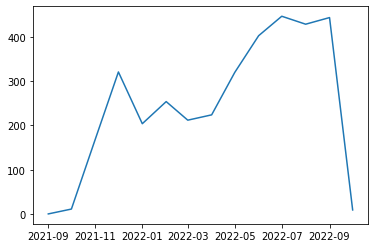

In [62]:
import matplotlib.pyplot as plt

plt.plot(temp["credit_application_date"], temp["default"])